# All Imports

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re

# Height Classifier

In [24]:
# Load train and test data
train_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Train_Balanced.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Test/Davanagere_Kharif_Data_Final_test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 

# Define target variable
target_column = "height_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_height = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_height.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_height.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_height"] = y_pred
test_df["Correct"] = test_df["Predicted_height"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_common.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_12464\954390633.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_12464\954390633.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.4921

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.31      0.32      2452
           2       0.72      0.58      0.64      4940
           3       0.17      0.55      0.27       601

    accuracy                           0.49      7993
   macro avg       0.41      0.48      0.41      7993
weighted avg       0.57      0.49      0.52      7993


🔹 Confusion Matrix:
 [[ 749  913  790]
 [1320 2854  766]
 [  92  179  330]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


### Step: Print the Predictions

In [25]:
# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_common.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Height"])["Predicted_height"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/height_blr_rural_comparison_15Day.csv", index=False)

# Print the result
print(result)

Predicted_height  Crop_Name  Height     1     2    3
0                     Avare  Medium     3    15    6
1                     Bajra   Short    15    27    2
2                    Banana    Tall    16    33   59
3                   Coconut    Tall    55    99  214
4                     Jowar  Medium    12    15    3
5                     Maize  Medium  1292  2782  753
6                   Mangoes    Tall     6    13    8
7                     Paddy   Short   595   622  746
8                      Ragi   Short   139   264   42
9                   Redgram  Medium    13    42    4
10                Sugarcane    Tall    15    34   49


### Step: Feature Importance


🔹 Top 10 Important Features:
1. VH_5 (0.0327)
2. VH_11 (0.0318)
3. VH_7 (0.0311)
4. VV_7 (0.0246)
5. VH_1 (0.0242)
6. VH_2 (0.0227)
7. VH_8 (0.0221)
8. VH_10 (0.0211)
9. VH_3 (0.0208)
10. VV_11 (0.0207)


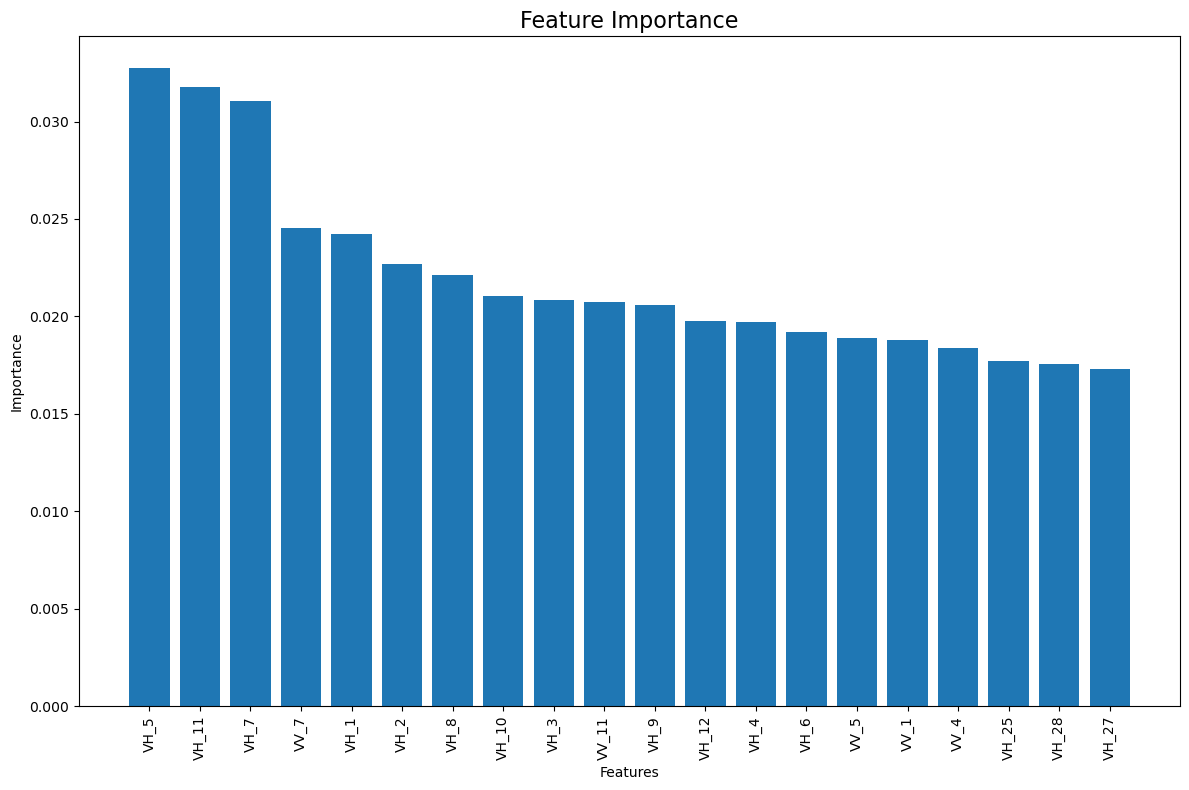

In [26]:

# --- Feature Importance ---
importances = rf_classifier_height.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Duration Classifier

In [27]:
# Load train and test data
train_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Train_Balanced.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Test/Davanagere_Kharif_Data_Final_test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 

# Define target variable
target_column = "duration_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_duration = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_duration.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_duration.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_duration"] = y_pred
test_df["Correct"] = test_df["Predicted_duration"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_duration.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_duration.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_12464\2887352392.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_12464\2887352392.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.4675

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.54      0.18       543
           2       0.89      0.45      0.60      6849
           3       0.19      0.56      0.29       601

    accuracy                           0.47      7993
   macro avg       0.40      0.52      0.36      7993
weighted avg       0.78      0.47      0.55      7993


🔹 Confusion Matrix:
 [[ 294  199   50]
 [2394 3108 1347]
 [  80  186  335]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


### Print Predictions

In [28]:
# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_duration.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Duration"])["Predicted_duration"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/duration_blr_rural_comparison.csv", index=False)

# Print the result
print(result)

Predicted_duration  Crop_Name Duration     1     2    3
0                       Avare      Low    10     9    5
1                       Bajra      Low    23    19    2
2                      Banana     Long    12    31   65
3                     Coconut     Long    47   105  216
4                       Jowar      Low    17    11    2
5                       Maize   Medium  2083  2035  709
6                     Mangoes     Long    11     8    8
7                       Paddy   Medium   278  1049  636
8                        Ragi      Low   244   160   41
9                     Redgram   Medium    33    24    2
10                  Sugarcane     Long    10    42   46


### Feature Importance


🔹 Top 10 Important Features:
1. VH_5 (0.0319)
2. VH_11 (0.0292)
3. VH_7 (0.0282)
4. VH_1 (0.0269)
5. VV_1 (0.0266)
6. VH_21 (0.0236)
7. VH_2 (0.0233)
8. VH_8 (0.0224)
9. VH_3 (0.0213)
10. VV_2 (0.0210)


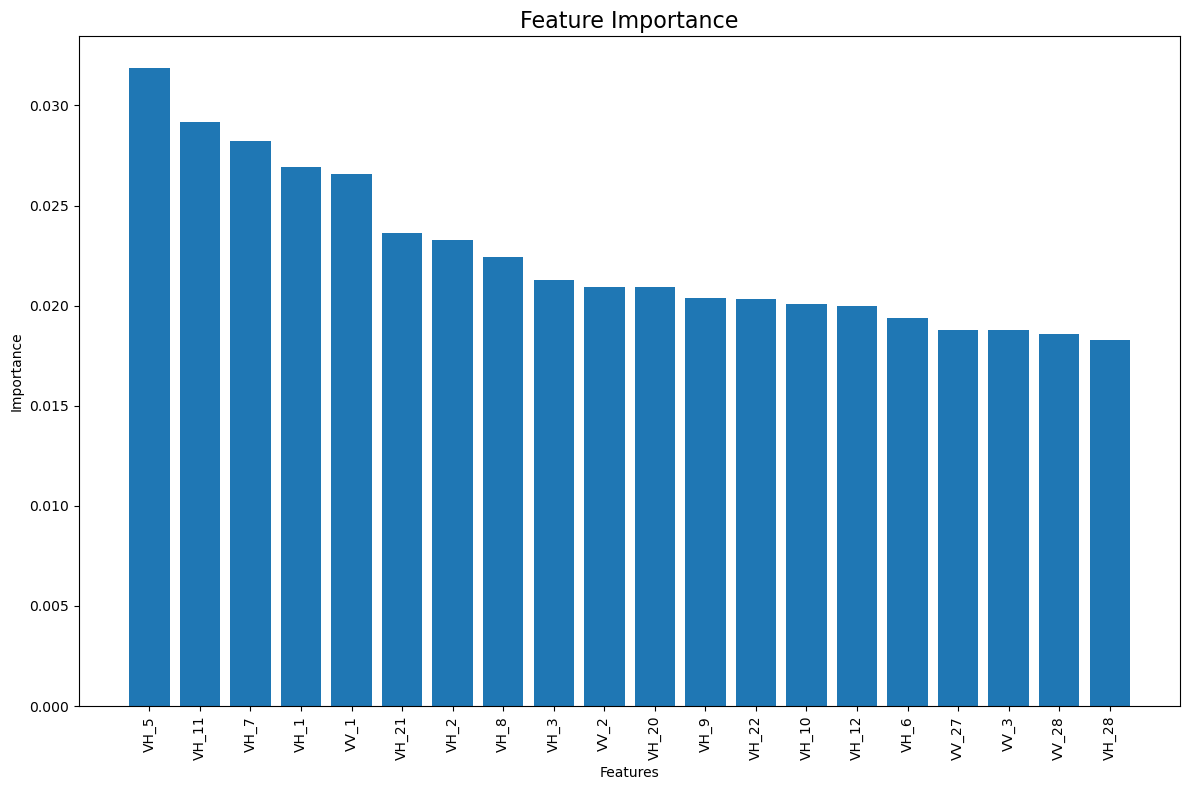

In [29]:

# --- Feature Importance ---
importances = rf_classifier_duration.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Structure Classifier

In [30]:
train_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Train_Balanced.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Test/Davanagere_Kharif_Data_Final_test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 


# Define target variable
target_column = "Structure_Numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_structure = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_structure.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_structure.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_Structure"] = y_pred
test_df["Correct"] = test_df["Predicted_Structure"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Karnataka_Datasets/Across/S2/Results.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
#misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_12464\1454268525.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_12464\1454268525.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.7562

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.28      0.31      0.29       503
           2       0.01      0.13      0.02        83
           3       0.94      0.79      0.86      7407

    accuracy                           0.76      7993
   macro avg       0.41      0.41      0.39      7993
weighted avg       0.89      0.76      0.82      7993


🔹 Confusion Matrix:
 [[ 158   65  280]
 [   3   11   69]
 [ 408 1124 5875]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


### Print Results

In [31]:
# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Across/S2/Results.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Structure"])["Predicted_Structure"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Karnataka_Datasets/Across/Pred.csv", index=False)

# Print the result
print(result)

Predicted_Structure  Crop_Name   Structure    1    2     3
0                        Avare       Shrub    2    3    19
1                        Bajra  Grass Crop    1   10    33
2                       Banana        Tree   37   18    53
3                      Coconut        Tree  119   43   206
4                        Jowar  Grass Crop    2    5    23
5                        Maize  Grass Crop  259  790  3778
6                      Mangoes        Tree    2    4    21
7                        Paddy  Grass Crop  118  222  1623
8                         Ragi  Grass Crop   10   85   350
9                      Redgram       Shrub    1    8    50
10                   Sugarcane  Grass Crop   18   12    68


### Feature Importance


🔹 Top 10 Important Features:
1. VV_4 (0.0320)
2. VH_5 (0.0312)
3. VH_4 (0.0308)
4. VH_7 (0.0283)
5. VV_20 (0.0268)
6. VV_16 (0.0267)
7. VH_11 (0.0260)
8. VH_12 (0.0249)
9. VV_7 (0.0248)
10. VV_12 (0.0205)


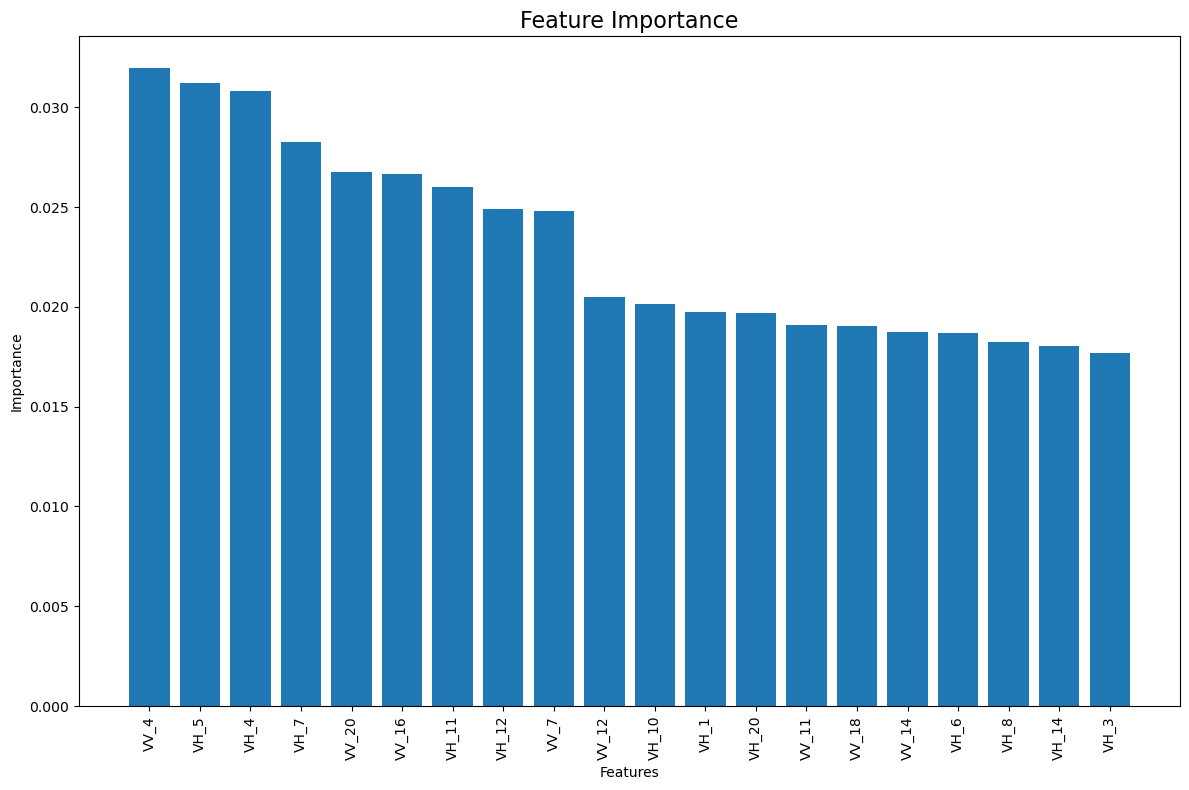

In [33]:

# --- Feature Importance ---
importances = rf_classifier_structure.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### Unique Triplet Identification

In [34]:
# Group crops by (height, structure, duration) triplet
triplet_to_crops = train_df.groupby(["height_numeric", "Structure_Numeric", "duration_numeric"])["Crop_Name"].unique()

# Print nicely
for triplet, crops in triplet_to_crops.items():
    crops_list = ", ".join(crops)
    print(f"Triplet {triplet}: {crops_list}")

Triplet (1, 2, 2): Rose
Triplet (1, 3, 1): Ragi, Bajra
Triplet (1, 3, 2): Paddy
Triplet (2, 2, 1): Avare
Triplet (2, 2, 2): Redgram
Triplet (2, 3, 1): Jowar
Triplet (2, 3, 2): Maize
Triplet (3, 1, 3): Coconut, Mangoes, Guava, Arecanut, Lemon, Sapota, Banana, Eucalyptus
Triplet (3, 3, 3): Sugarcane


### Combining the Three Classifiers

In [35]:

# --------------------------------------
# 1. Load Train/Test Data
# --------------------------------------

train_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Train.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Test/Davanagere_Kharif_Data_Final_test.csv")

# Extract only VV_i and VH_i features (first 15 VV and 15 VH)
VV_columns = sorted([col for col in train_df.columns if col.startswith("VV_")])
VH_columns = sorted([col for col in train_df.columns if col.startswith("VH_")])
feature_columns = VV_columns + VH_columns

X_train = train_df[feature_columns]
X_test = test_df[feature_columns]

# Fill missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# --------------------------------------
# 2. Train three models separately
# --------------------------------------

# Height Model
height_model = RandomForestClassifier(n_estimators=100, random_state=42)
height_model.fit(X_train, train_df["height_numeric"])

# Structure Model
structure_model = RandomForestClassifier(n_estimators=100, random_state=42)
structure_model.fit(X_train, train_df["Structure_Numeric"])

# Duration Model
duration_model = RandomForestClassifier(n_estimators=100, random_state=42)
duration_model.fit(X_train, train_df["duration_numeric"])

# --------------------------------------
# 3. Predict using the three models
# --------------------------------------

height_pred = height_model.predict(X_test)
structure_pred = structure_model.predict(X_test)
duration_pred = duration_model.predict(X_test)

# Add predictions to test_df
test_df["pred_height"] = height_pred
test_df["pred_structure"] = structure_pred
test_df["pred_duration"] = duration_pred

# --------------------------------------
# 4. Define Grouped Triplet Mapping
# --------------------------------------

triplet_mapping = {
    (1, 3, 1): "Millets",    # Bajra, Ragi
    (3, 1, 3): "Tree",  # Arecanut, Banana, Coconut, Eucalyptus, Guava, Lemon, Mangoes, Sapota
    (2, 2, 1): "Avare",
    (2, 3, 1): "Jowar",
    (2, 3, 2): "Maize",
    (1, 3, 2): "Paddy",
    (2, 2, 2): "Redgram",
    (1, 2, 2): "Rose",
    (3, 3, 3): "Sugarcane",
}

def lookup_crop(height, structure, duration):
    key = (height, structure, duration)
    return triplet_mapping.get(key, "Ambiguous")  # fallback if key not found

# Apply lookup
test_df["predicted_crop"] = test_df.apply(
    lambda row: lookup_crop(row["pred_height"], row["pred_structure"], row["pred_duration"]),
    axis=1
)

# --------------------------------------
# 5. Remap Ground Truth Also (Optional but Important)
# --------------------------------------

# Create manual mapping for ground truth Crop_Names to group names
ground_truth_mapping = {
    "Bajra": "Millets",
    "Ragi": "Millets",
    "Jowar": "Jowar",
    "Maize": "Maize",
    "Paddy": "Paddy",
    "Redgram": "Redgram",
    "Rose": "Rose",
    "Sugarcane": "Sugarcane",
    "Avare": "Avare",
    "Arecanut": "Tree",
    "Banana": "Tree",
    "Coconut": "Tree",
    "Eucalyptus": "Tree",
    "Guava": "Tree",
    "Lemon": "Tree",
    "Mangoes": "Tree",
    "Sapota": "Tree",
}

# Remap true labels
test_df["true_crop_grouped"] = test_df["Crop_Name"].map(ground_truth_mapping).fillna("Unknown")

# --------------------------------------
# 6. Evaluate
# --------------------------------------

# Basic accuracy (strict)
crop_accuracy = (test_df["predicted_crop"] == test_df["true_crop_grouped"]).mean()

print(f"🔹 Overall Crop Prediction Accuracy: {crop_accuracy:.4f}")

# Save for inspection
test_df.to_csv("Results/final_predictions_combined_model.csv", index=False)

# See confusion matrix
print("\n🔹 Confusion Matrix (Strict):")
print(confusion_matrix(test_df["true_crop_grouped"], test_df["predicted_crop"]))

print("\n🔹 Classification Report (Strict):")
print(classification_report(test_df["true_crop_grouped"], test_df["predicted_crop"]))

C:\Users\prath\AppData\Local\Temp\ipykernel_12464\1532928018.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_12464\1532928018.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Overall Crop Prediction Accuracy: 0.1843

🔹 Confusion Matrix (Strict):
[[   0    0    0    0    0    0    0    0    0    0]
 [   4    0    5    6    4    1    0    0    2    2]
 [   2    0   11    6    6    3    0    0    1    1]
 [ 391    5 1480 1005  752  323    4   25  674  168]
 [  27    0  180   98   96   40    1    1   38    8]
 [ 353    0  171  291   99  189    2    5  783   70]
 [   1    0   24   14    8    9    0    0    2    1]
 [   0    0    0    0    0    0    0    0    0    0]
 [  13    1   11   12    1    2    0    0   47   11]
 [  67    1   42   60   14   13    0    1  180  125]]

🔹 Classification Report (Strict):
              precision    recall  f1-score   support

   Ambiguous       0.00      0.00      0.00         0
       Avare       0.00      0.00      0.00        24
       Jowar       0.01      0.37      0.01        30
       Maize       0.67      0.21      0.32      4827
     Millets       0.10      0.20      0.13       489
       Paddy       0.33      0.10   

C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Printing Results

In [36]:
# Load the CSV file
df = pd.read_csv("Results/final_predictions_combined_model.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "true_crop_grouped"])["predicted_crop"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
#result.to_csv("Karnataka_Datasets/Across/Pred.csv", index=False)

# Print the result
print(result)

predicted_crop  Crop_Name true_crop_grouped  Ambiguous  Avare  Jowar  Maize  \
0                   Avare             Avare          4      0      5      6   
1                   Bajra           Millets          2      0     17      8   
2                  Banana              Tree         16      1      9     15   
3                 Coconut              Tree         46      0     27     39   
4                   Jowar             Jowar          2      0     11      6   
5                   Maize             Maize        391      5   1480   1005   
6                 Mangoes              Tree          5      0      6      6   
7                   Paddy             Paddy        353      0    171    291   
8                    Ragi           Millets         25      0    163     90   
9                 Redgram           Redgram          1      0     24     14   
10              Sugarcane         Sugarcane         13      1     11     12   

predicted_crop  Millets  Paddy  Redgram  Rose  Suga